In [3]:
import sympy
from sympy.matrices import Matrix

Используем проекцию из $R^n$ в $R^{(n-1)}$ как параметризацию

Нам нужная только положительная часть

In [8]:
n = 2
x = sympy.MatrixSymbol('x', n, 1)
y = sympy.MatrixSymbol('y', n, 1)

((-1)*y' + x')*((-1)*y + x)

In [18]:
dist = ((x - y).T * (x - y))[0, 0]
dist

(x[0, 0] - y[0, 0])**2 + (x[1, 0] - y[1, 0])**2

In [20]:
sympy.diff(dist, x[0, 0])

2*(x[0, 0] - y[0, 0])

# Without gradients

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib notebook

In [115]:
n = 5 # space dimension. Sphere is n - 1 dimensional
k = 12 # number of vectors

Vn = np.random.rand(k, n) # cords in R^n
Vn = Vn / ((Vn**2).sum(axis = 1) ** 0.5).reshape(k,1)

Vp = Vn[:, 0:-1]

def unproject(Vpv):
    Vn = np.zeros(Vpv.shape[0] + 1)
    Vn[0:-1] = Vpv
    Vn[-1] = (max(1 - (Vpv**2).sum(), 0))**0.5
    return Vn

def dist(Vp1, Vp2):
    return ((unproject(Vp1) - unproject(Vp2))**2 ).sum() ** 0.5

def inner(Vp1, Vp2):
    return np.inner(unproject(Vp1), unproject(Vp2))

def max_cov(Vp):
    Vp = Vp.reshape((k, n - 1))
    m = 0
    for i in xrange(k):
        for j in xrange(k):
            if i == j: 
                continue
            m = max(m, inner(Vp[i, :], Vp[j, :]))
    return m

def L(Vp):
    Vp = Vp.reshape((k, n - 1))
    m = 0
    for i in xrange(k):
        m_loc = 0
        for j in xrange(k):
            if i == j: 
                continue
            m_loc = max(m_loc, inner(Vp[i, :], Vp[j, :]) ** 2)
        m += m_loc
    return m + ((Vp < 0) * np.absolute(Vp)).sum() * 10


def plot2d():
    plt.figure(figsize = (6, 6))
    Vn_ = np.apply_along_axis(unproject, 1, Vp)
    print Vn_
    axes = plt.gca()
    axes.set_ylim([0, 1])
    axes.set_xlim([0, 1])
    plt.plot(Vn_[:, 0], Vn_[:, 1], 'o')

def plot3d():
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize = (6, 6))
    Vn_ = np.apply_along_axis(unproject, 1, Vp)
    print Vn_
    ax = Axes3D(fig)
    #axes = plt.gca()
    #axes.set_ylim([0, 1])
    #axes.set_xlim([0, 1])
    X = np.linspace(0, 1, 10)
    Y = np.linspace(0, 1, 10)
    X, Y = np.meshgrid(X, Y)
    Z = (np.maximum(1 - X**2 - Y**2, 0)) ** 0.5
    #ax.plot(X, Y, Z, 'r.')
    ax.plot(Vn_[:, 0], Vn_[:, 1], Vn_[:, 2], 'o')

In [107]:
L(Vp)

8.9341997866141263

In [117]:
for iteration in xrange(10):
    for i in xrange(k):
        Vp_ = Vp.copy()
        def L_(v):
            Vp_[i, :] = v
            return L(Vp_)
        res = scipy.optimize.minimize(L_, Vp[i, :], method = 'Nelder-Mead', tol=1e-5, 
            options = {
                #'disp': True,
                'maxiter': 10000,
                'maxfev': 10000
            })
        #print res
        Vp[i, :] = res.x
        print L(Vp)

5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397
5.33439617397


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


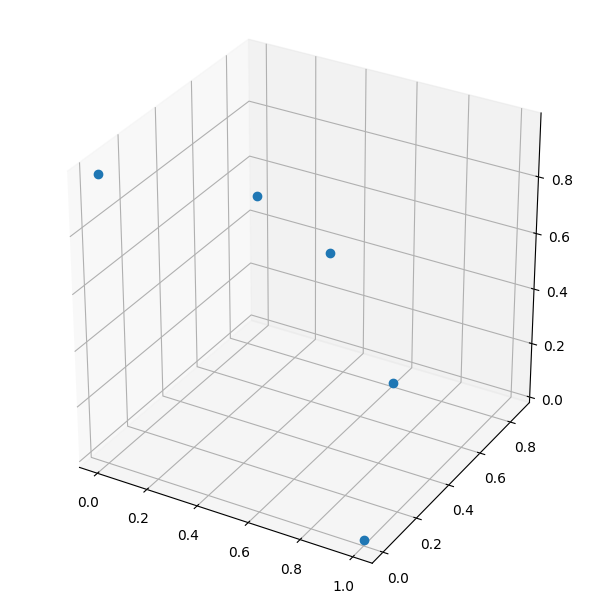

[[  1.00000710e+00   1.04796461e-05   0.00000000e+00]
 [  6.10161191e-01   7.92277496e-01   0.00000000e+00]
 [  1.10814314e-07   8.65828198e-01   5.00341415e-01]
 [  6.10446491e-01   3.95818408e-01   6.86063313e-01]
 [  6.65007824e-06   2.51464133e-06   1.00000000e+00]]


In [103]:
plot3d()

In [104]:
L(Vp)

2.2552898353787119

In [118]:
max_cov(Vp)

0.69828238301699641

In [1]:
f = open('iter0alphas', 'r')
fr = open('iter0alphas2', 'w')


In [3]:
lines = []
for line in f.readlines():
    line = line.strip()
    for i in range(10000):
        line = line.replace('(-','(0-')
    lines += [line]
fr.write('\n'.join(lines))